<a href="https://colab.research.google.com/github/MasoudMoeini/Image-blur-detection/blob/main/image_blur_detection_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib . pyplot as plt
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [2]:
!unzip -qq train.zip

In [4]:
!unzip -qq test.zip

In [3]:
!ls train

fixations  images


In [5]:
from datareader import DataReader
train_images = DataReader('train')
#test_images=DataReader('test')

In [13]:
input = layers.Input(shape=(224, 224, 3))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(x)
x = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(512, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(512, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(256, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(128, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(128, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=1, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(16, (3, 3), strides=1, activation="sigmoid", padding="same")(x)
x = layers.Conv2DTranspose(3, (3, 3), strides=1, activation="sigmoid", padding="same")(x)

In [14]:
encoder_decoder = Model(input, x)

In [15]:
encoder_decoder.compile(keras.optimizers.Adam(learning_rate=1e-3),
                        loss=tf.keras.losses.MeanSquaredError(),)
encoder_decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 conv2d_12 (Conv2D)          (None, 112, 112, 64)      36928     
                                                           

In [12]:
## Optimize
batch_size=10
epochs = 20
num_batches= train_images.num_batches_of_size(batch_size)
for epoch in range(epochs):
  for index in range(num_batches):
    print('epoch {} batch number {}'.format(epoch, index))
    x,y,_=train_images.get_batch(batch_size)  
    encoder_decoder.fit(x,y,epochs = 1,batch_size=10)
from keras.models import load_model
encoder_decoder.save('encoderdecoder_model.h5')

epoch 0 batch number 0
1/1 [==============================] - 0s 411ms/step - loss: 0.1992 - binary_accuracy: 0.2541 - false_negatives: 1116051.0000
epoch 0 batch number 1
1/1 [==============================] - 0s 348ms/step - loss: 0.1965 - binary_accuracy: 0.2684 - false_negatives: 1094624.0000
epoch 0 batch number 2
1/1 [==============================] - 0s 342ms/step - loss: 0.1988 - binary_accuracy: 0.2225 - false_negatives: 1163705.0000
epoch 0 batch number 3
1/1 [==============================] - 0s 342ms/step - loss: 0.1884 - binary_accuracy: 0.2906 - false_negatives: 1061171.0000
epoch 0 batch number 4
1/1 [==============================] - 0s 340ms/step - loss: 0.1891 - binary_accuracy: 0.2164 - false_negatives: 1172907.0000
epoch 0 batch number 5
1/1 [==============================] - 0s 330ms/step - loss: 0.1991 - binary_accuracy: 0.2313 - false_negatives: 1150385.0000
epoch 0 batch number 6
1/1 [==============================] - 0s 338ms/step - loss: 0.2038 - binary_accura

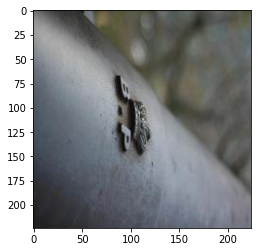

In [37]:
from PIL import Image
import numpy
from numpy import asarray
from tensorflow.keras.preprocessing.image import img_to_array
img = Image.open("out_of_focus0080_shi.jpg")
plt.imshow(img)
img = asarray(img).astype(np.float32)/ 255.0
#img_1=img.reshape(1,224,224,3)/ 255.0
img = img_to_array(img)
img = np.expand_dims(img, axis=0)

In [38]:
pred = encoder_decoder.predict(img)
pred = (pred[0]*255.0).astype(np.uint8)
#pred = pred.argmax(axis=1)
#predictions = encoder_decoder.predict('img_1')

In [39]:
pred.shape

(224, 224, 3)

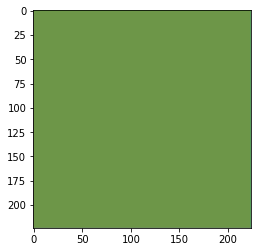

In [40]:
plt.imshow(pred)